In [26]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import hvplot.xarray
import warnings
warnings.filterwarnings("ignore")

In [2]:
def CRF(filename):
    """calculates CRF on lat/lon grid, plots global mean in a time series"""
    
    ds=xr.open_dataset(filename)
    weights=np.cos(np.deg2rad(ds.lat))
    
    ###variables
    ttrc=ds.ttrc
    tsrc=ds.tsrc
    ttr=ds.ttr
    tsr=ds.tsr
    
    ###Calculation of CRF still wrong
    CRF_LW=ttrc-ttr
    CRF_SW=tsrc-tsr
    CRF=CRF_SW+CRF_LW
    CRF_weighted=CRF.weighted(weights)
    CRF_global_mean=CRF_weighted.mean(('lat', 'lon'))/10800
    
    ###plotting
    plt.figure(figsize=(15,5))
    CRF_global_mean.plot()
    plt.ylabel('CRF [$W/m^2$]')
    plt.xlabel('Time')
    plt.savefig(filename[:-3]+'_CRF.png')

In [18]:
def output_variable(filename, var):
    """input: netcdf data, plots global average of surface pressure"""
    ds=xr.open_dataset(filename)
    
    variable=ds[var]
    weights=np.cos(np.deg2rad(ds.lat))
    var_weighted=variable.weighted(weights)
    
    var_global_mean=var_weighted.mean(('lat', 'lon'))
    
    ###plotting
    plt.figure(figsize=(15,5))
    var_global_mean.plot()
    plt.ylabel(var+' ['+variable.attrs['units']+']')
    plt.xlabel('Time')
    plt.savefig(filename[:-3]+'_'+var+'.png')

In [28]:
variable_list=['es','tclw','tciw','sp','tcwv','lsp','cp','sf','sshf','slhf','msl','2t','2d','ssrd','strd','ssr','str','tsr','ttr','e','tsrc','ttrc','ssrc','strc','tisr','tp','skt']

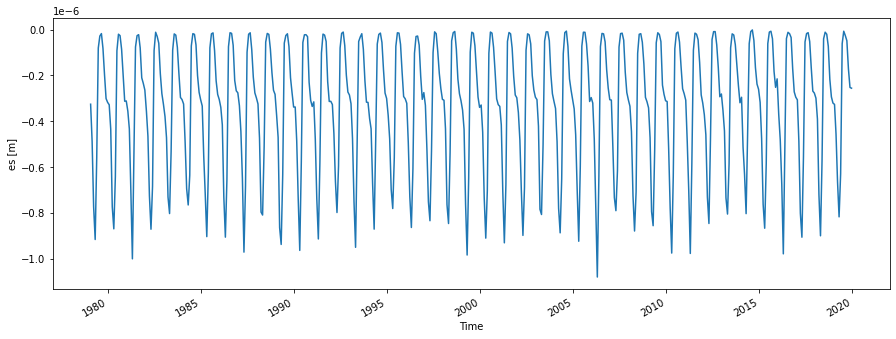

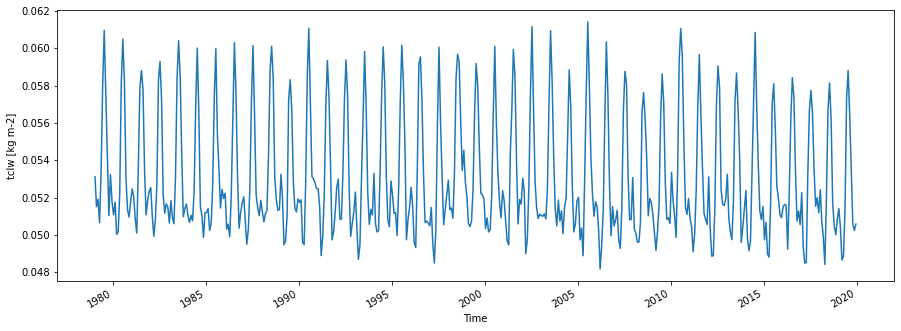

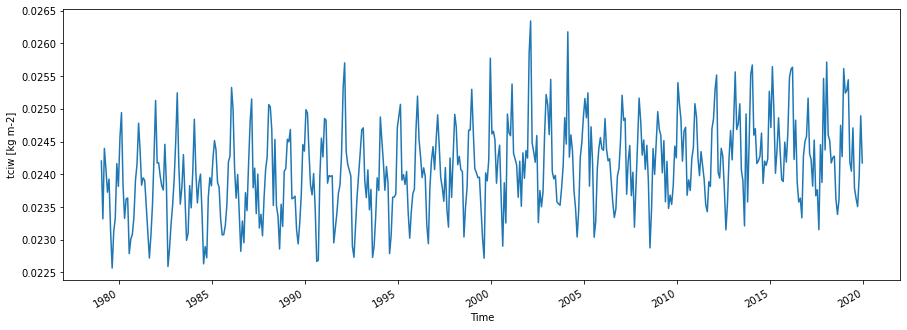

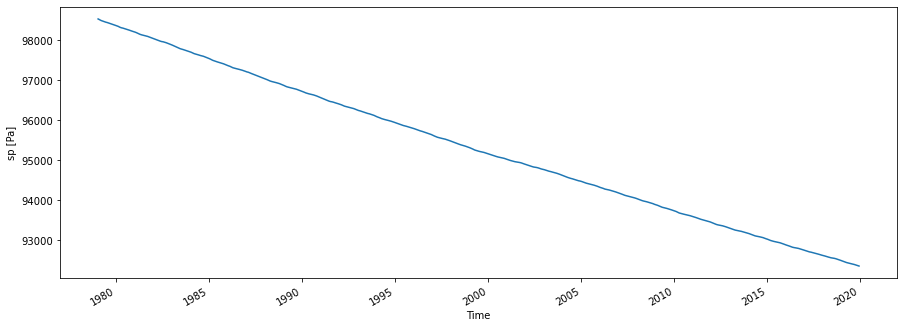

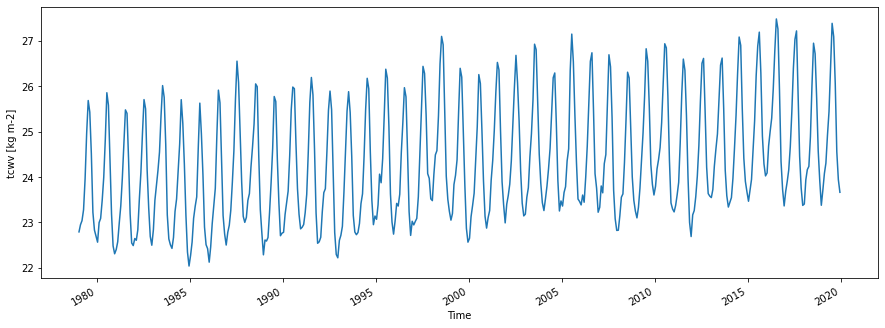

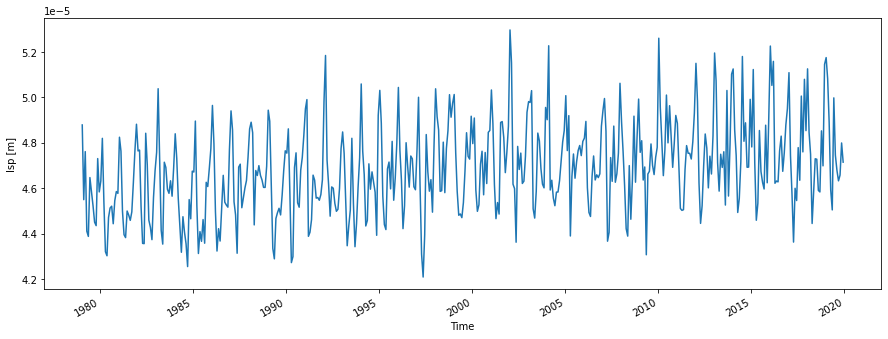

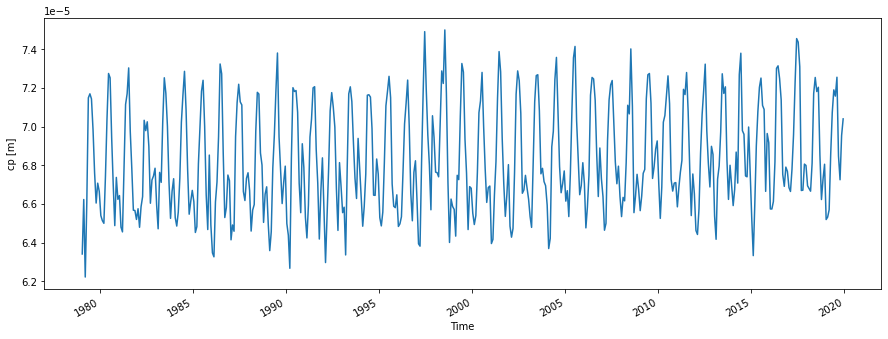

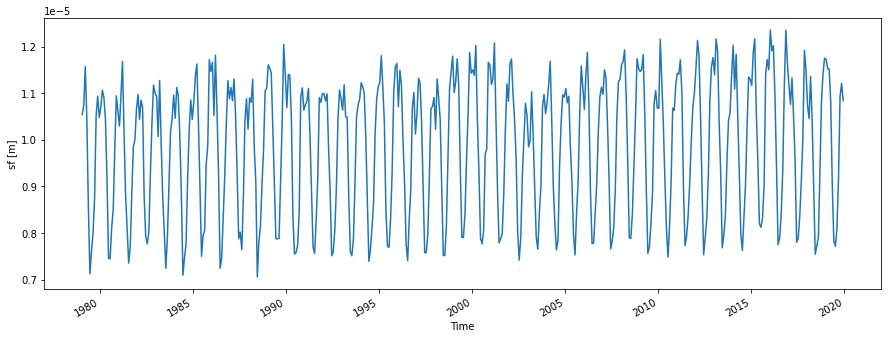

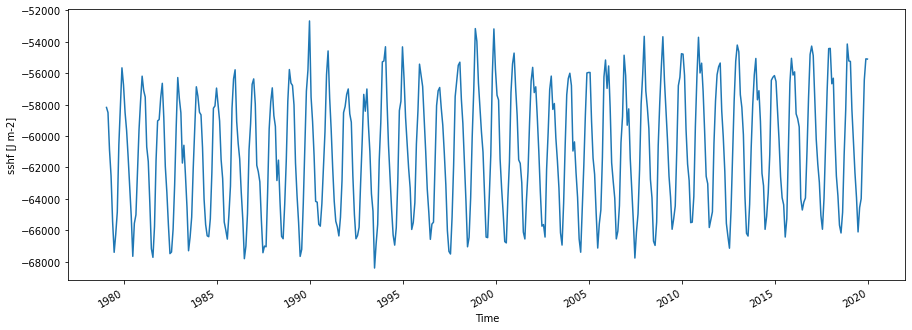

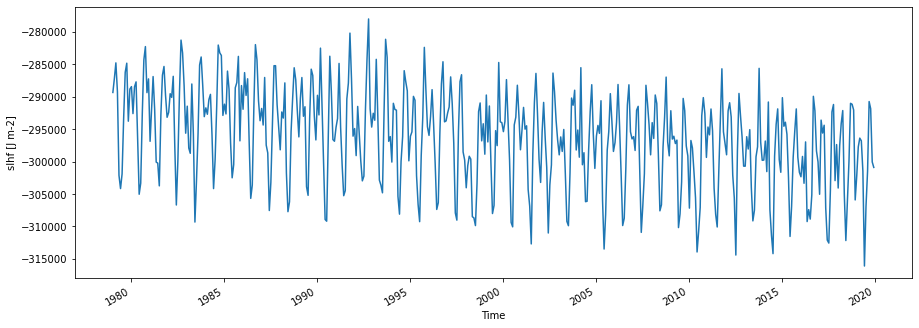

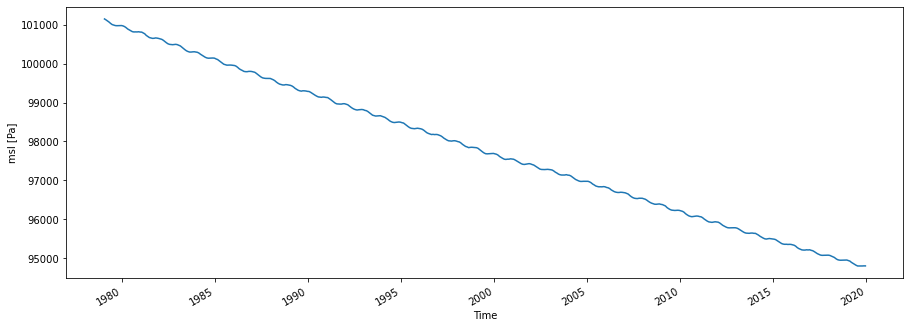

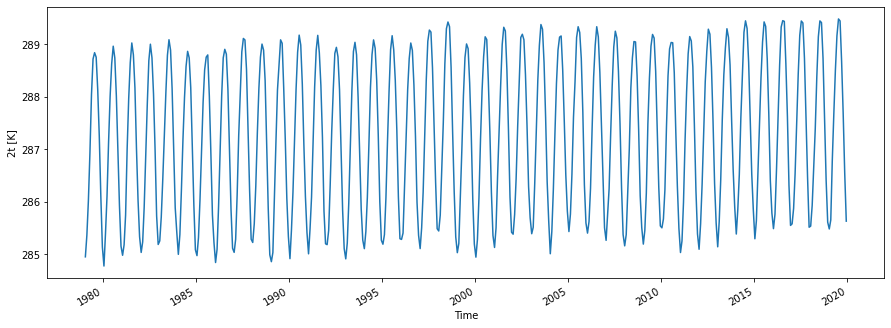

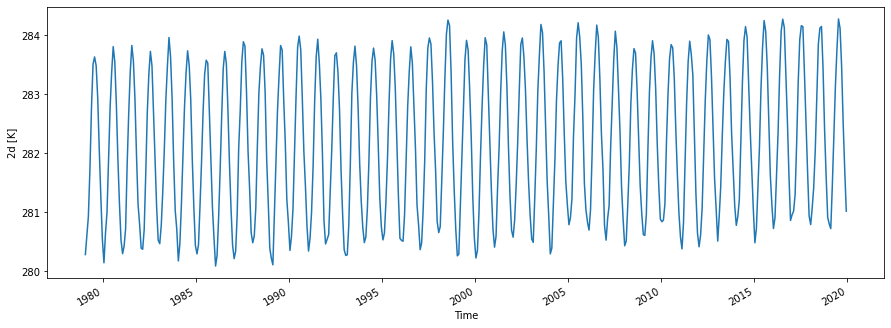

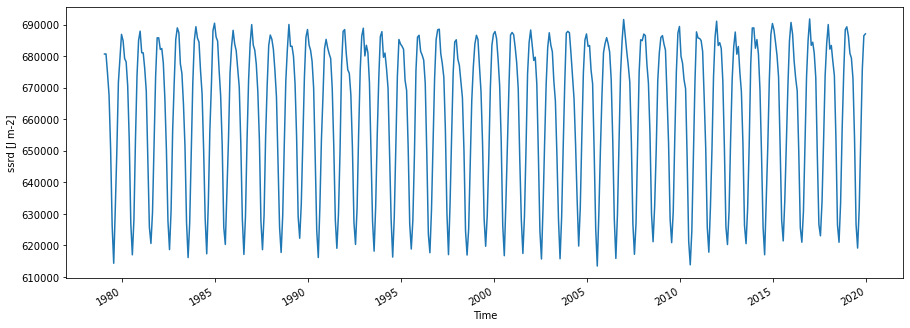

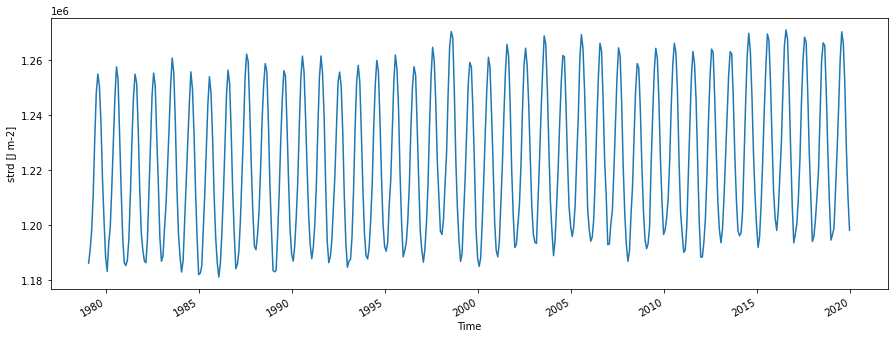

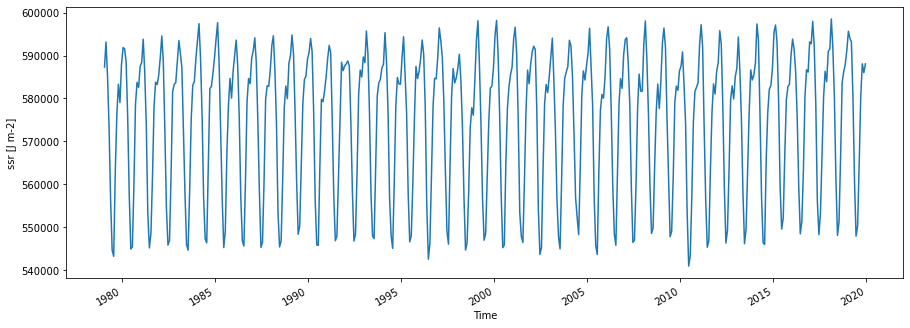

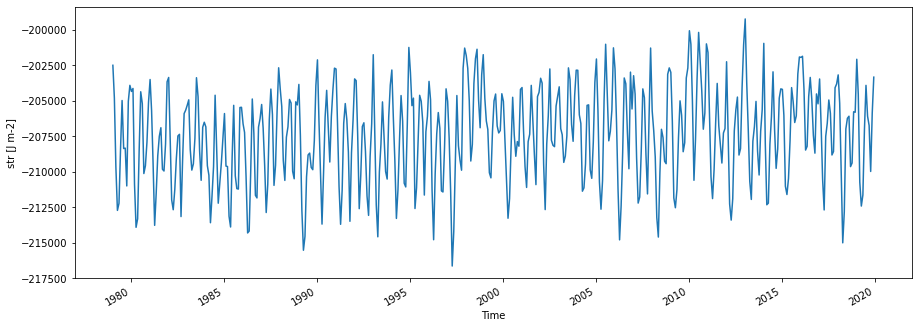

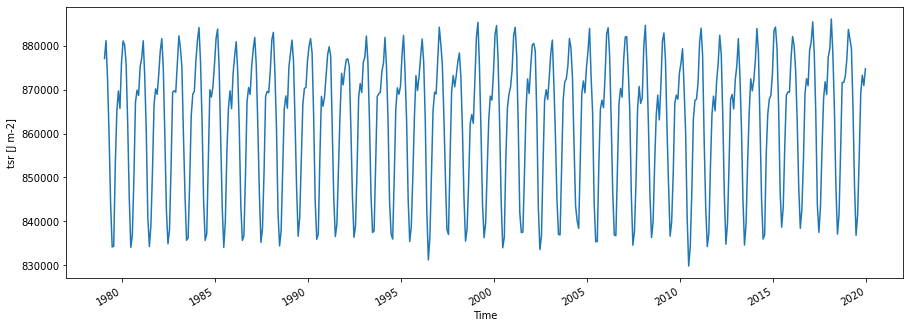

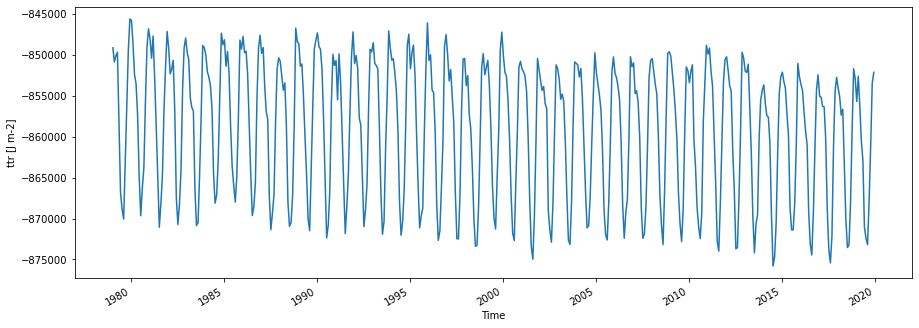

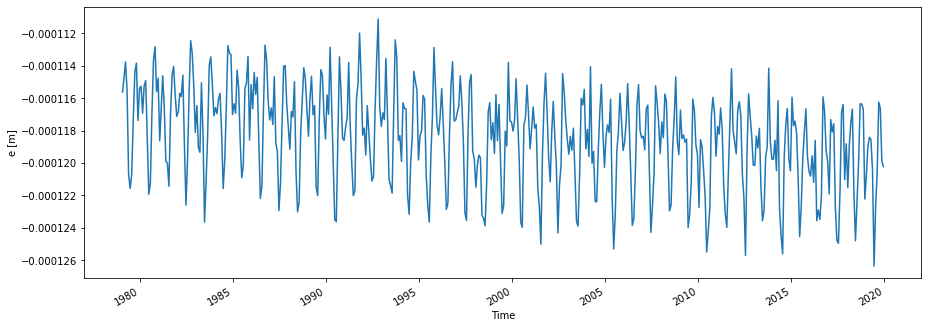

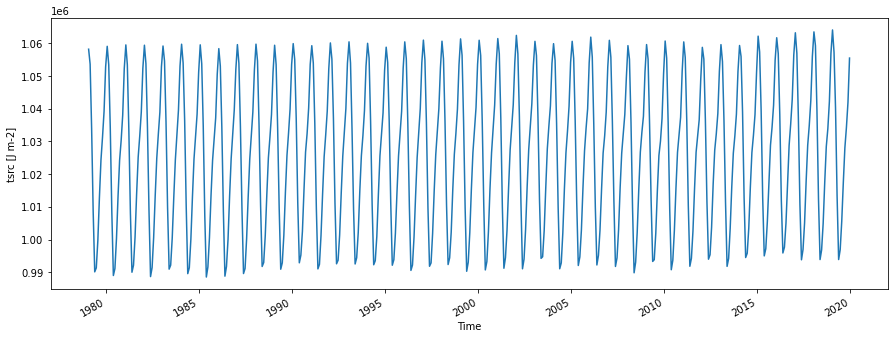

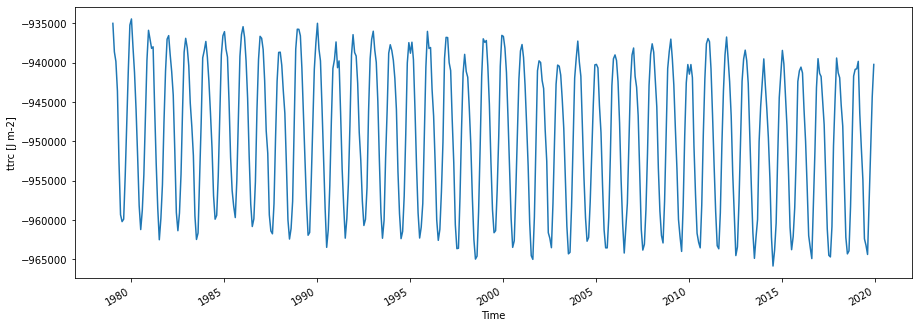

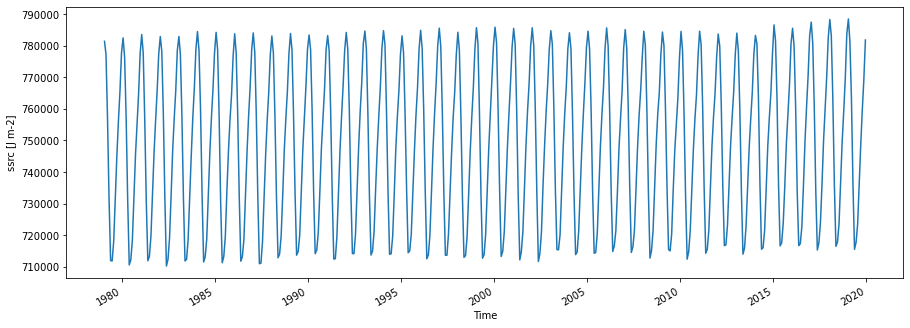

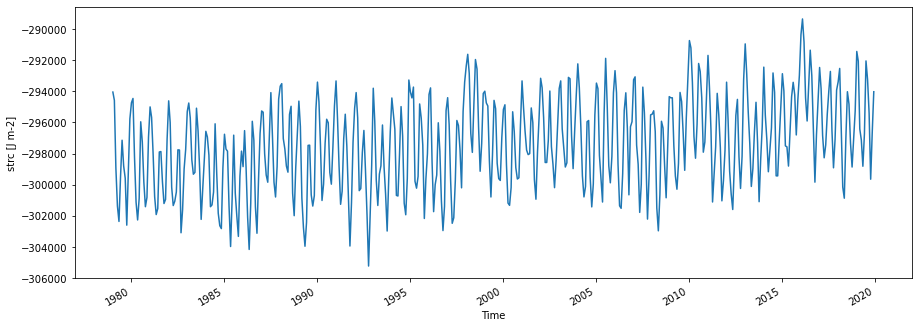

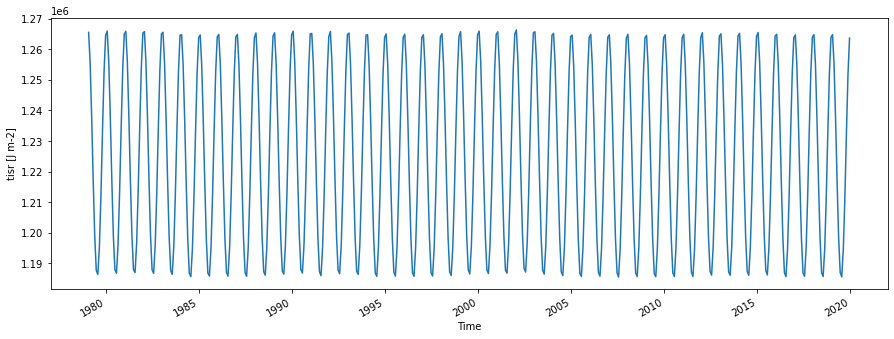

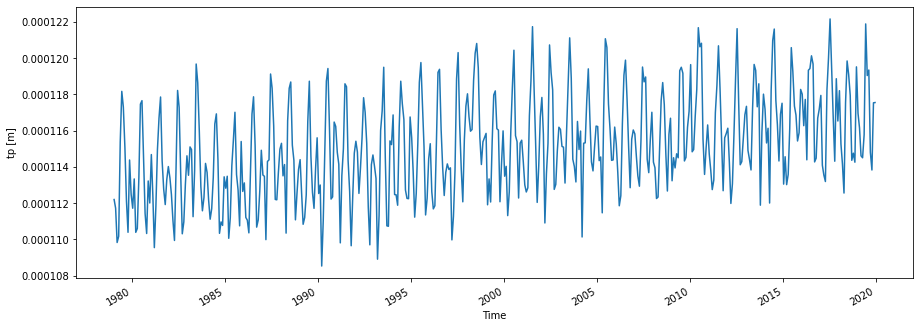

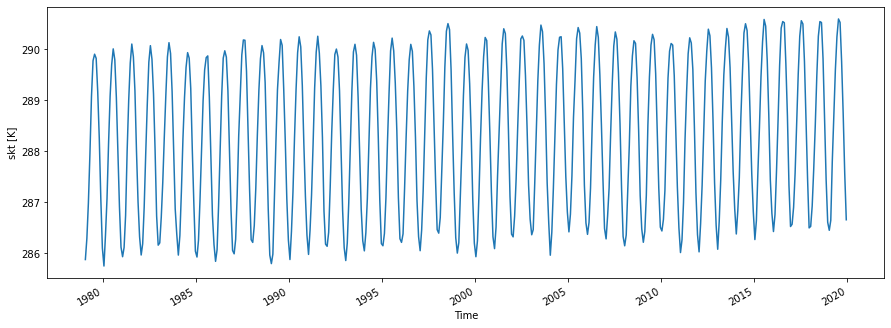

In [29]:
for i in variable_list:
    output_variable('ECE3_1m_19790101-20191231_regular_sfc.nc', i)